# **Delay Patterns Study Notebook**

## Objectives

* Answer business requirement 1:
  * Use the collections dataset (outputs/datasets/collection/airlineDelayPredictor.csv) to explore patterns of flight delays across airlines and airports
  * Identify and visualize airlines, airports and month prone to high delays.

## Inputs

* outputs/datasets/collection/airlineDelayPredictor.csv

## Outputs

* Generate code that answers business requirement 1 and will be used as inoput when building the dashboard in Streamlit App.

---

# Set working directory

In [1]:
import os
current_dir = os.getcwd()
os.chdir(os.path.dirname(current_dir))
current_dir = os.getcwd()
current_dir

'/workspaces/airline-delay-predictor'

In [2]:
# Disable warnings:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Load Data

In [3]:
import pandas as pd
df = pd.read_csv("outputs/datasets/collection/transtatsAirlineDelay.csv")
df.head(5)

year  month carrier       carrier_name airport  \
0  2025      6      9E  Endeavor Air Inc.     ABE   
1  2025      6      9E  Endeavor Air Inc.     ABY   
2  2025      6      9E  Endeavor Air Inc.     AEX   
3  2025      6      9E  Endeavor Air Inc.     AGS   
4  2025      6      9E  Endeavor Air Inc.     ALB   

                                        airport_name  arr_flights  arr_del15  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...         90.0       26.0   
1             Albany, GA: Southwest Georgia Regional          5.0        1.0   
2           Alexandria, LA: Alexandria International         69.0       23.0   
3        Augusta, GA: Augusta Regional at Bush Field        155.0       43.0   
4                   Albany, NY: Albany International         86.0       29.0   

   arr_cancelled  arr_diverted  ...  late_aircraft_freq        date  \
0            4.0           0.0  ...                0.37  2025-06-01   
1            0.0           0.0  ...                1.00  2025-06-01   
2            2.0           0.0  ...                0.23  2025-06-01   
3            9.0           0.0  ...                0.40  2025-06-01   
4            4.0           0.0  ...                0.54  2025-06-01   

   delayed_flights_perc  avg_delay_flights_all  avg_delay_flights_delayed  \
0                 28.89                  20.93                      72.46   
1                 20.00                  24.80                     124.00   
2                 33.33                  24.61                      73.83   
3                 27.74                  18.56                      66.91   
4                 33.72                  22.49                      66.69   

   carrier_delay_pct  weather_delay_pct  nas_delay_pct  security_delay_pct  \
0              29.78              11.84          14.97                 0.0   
1               0.00               0.00           0.00                 0.0   
2              57.77               3.18          17.31                 0.0   
3              28.75               6.88          17.97                 0.0   
4              32.99               0.00          10.03                 0.0   

   late_aircraft_delay_pct  
0                    43.42  
1                   100.00  
2                    21.73  
3                    46.40  
4                    56.98  

[5 rows x 30 columns]

---

# Data Exploration

Check variable types and distribution, missing values.

In [6]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Column data types and missing values

In [4]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407721 entries, 0 to 407720
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year                       407721 non-null  int64  
 1   month                      407721 non-null  int64  
 2   carrier                    407721 non-null  object 
 3   carrier_name               407721 non-null  object 
 4   airport                    407721 non-null  object 
 5   airport_name               407721 non-null  object 
 6   arr_flights                407061 non-null  float64
 7   arr_del15                  406766 non-null  float64
 8   arr_cancelled              407061 non-null  float64
 9   arr_diverted               407061 non-null  float64
 10  arr_delay                  407061 non-null  float64
 11  carrier_delay              407061 non-null  float64
 12  weather_delay              407061 non-null  float64
 13  nas_delay                  40

year                             0
month                            0
carrier                          0
carrier_name                     0
airport                          0
airport_name                     0
arr_flights                    660
arr_del15                      955
arr_cancelled                  660
arr_diverted                   660
arr_delay                      660
carrier_delay                  660
weather_delay                  660
nas_delay                      660
security_delay                 660
late_aircraft_delay            660
carrier_freq                     0
weather_freq                     0
nas_freq                         0
security_freq                    0
late_aircraft_freq               0
date                             0
delayed_flights_perc           955
avg_delay_flights_all          660
avg_delay_flights_delayed    13970
carrier_delay_pct            13970
weather_delay_pct            13970
nas_delay_pct                13970
security_delay_pct  

### Descriptive stats

In [5]:
df.describe().T

count         mean           std      min  \
year                       407721.0  2014.667518      6.594491  2003.00   
month                      407721.0     6.465546      3.450327     1.00   
arr_flights                407061.0   361.123026    993.493131     1.00   
arr_del15                  406766.0    69.714853    194.064358     0.00   
arr_cancelled              407061.0     6.731524     34.787477     0.00   
arr_diverted               407061.0     0.836563      3.802138     0.00   
arr_delay                  407061.0  4199.511788  12885.326437     0.00   
carrier_delay              407061.0  1319.190148   3874.987953     0.00   
weather_delay              407061.0   226.715595    899.568613     0.00   
nas_delay                  407061.0  1030.725346   4350.575825   -19.00   
security_delay             407061.0     7.143534     39.144603     0.00   
late_aircraft_delay        407061.0  1615.730053   5205.828367     0.00   
carrier_freq               407721.0     0.363587      0.209004     0.00   
weather_freq               407721.0     0.043562      0.080384     0.00   
nas_freq                   407721.0     0.269200      0.196506     0.00   
security_freq              407721.0     0.002337      0.016820     0.00   
late_aircraft_freq         407721.0     0.286951      0.193954     0.00   
delayed_flights_perc       406766.0    19.877671     11.470145     0.00   
avg_delay_flights_all      407061.0    11.847899     13.181330     0.00   
avg_delay_flights_delayed  393751.0    57.849541     31.002364    15.00   
carrier_delay_pct          393751.0    38.551433     22.108150     0.00   
weather_delay_pct          393751.0     6.121221     11.262110     0.00   
nas_delay_pct              393751.0    21.639238     18.386524    -1.73   
security_delay_pct         393751.0     0.209351      1.766984     0.00   
late_aircraft_delay_pct    393751.0    33.478519     21.688916     0.00   

                                 25%      50%       75%       max  
year                       2009.0000  2015.00  2021.000    2025.0  
month                         3.0000     6.00     9.000      12.0  
arr_flights                  55.0000   112.00   254.000   21977.0  
arr_del15                     8.0000    21.00    52.000    6377.0  
arr_cancelled                 0.0000     1.00     4.000    4951.0  
arr_diverted                  0.0000     0.00     1.000     256.0  
arr_delay                   407.0000  1147.00  2989.000  648300.0  
carrier_delay               134.0000   410.00  1079.000  321792.0  
weather_delay                 0.0000    23.00   157.000   64550.0  
nas_delay                    49.0000   184.00   557.000  238440.0  
security_delay                0.0000     0.00     0.000    3760.0  
late_aircraft_delay          77.0000   345.00  1099.000  279153.0  
carrier_freq                  0.2400     0.34     0.470       1.0  
weather_freq                  0.0000     0.01     0.050       1.0  
nas_freq                      0.1300     0.25     0.380       1.0  
security_freq                 0.0000     0.00     0.000       1.0  
late_aircraft_freq            0.1400     0.29     0.410       1.0  
delayed_flights_perc         12.2825    18.58    25.830     100.0  
avg_delay_flights_all         5.7800     9.87    15.430    3174.0  
avg_delay_flights_delayed    42.5000    53.00    66.165    3174.0  
carrier_delay_pct            23.3300    35.22    50.700     100.0  
weather_delay_pct             0.0000     1.57     7.200     100.0  
nas_delay_pct                 8.9900    17.39    29.330     100.0  
security_delay_pct            0.0000     0.00     0.000     100.0  
late_aircraft_delay_pct      16.8200    33.55    48.350     100.0

# Timeseries of delays

### Delay Trends

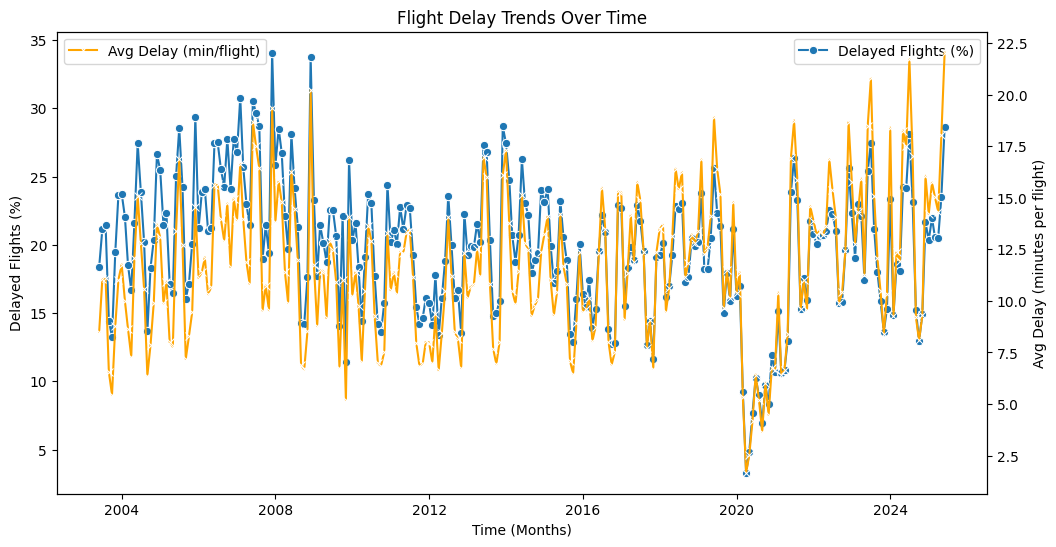

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

monthly_trend = df.groupby("date")[["delayed_flights_perc", "avg_delay_flights_all"]].mean().reset_index()
monthly_trend['date'] = pd.to_datetime(monthly_trend['date'])

fig, ax1 = plt.subplots(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x="date", y="delayed_flights_perc", marker="o", ax=ax1, label="Delayed Flights (%)")
ax2 = ax1.twinx()
sns.lineplot(data=monthly_trend, x="date", y="avg_delay_flights_all", color="orange", marker="x", ax=ax2, label="Avg Delay (min/flight)")
# ax1.set_xticks(range(len(df)), labels=range(2011, 2019))

ax1.set_title("Flight Delay Trends Over Time")
ax1.set_xlabel("Time (Months)")
ax1.set_ylabel("Delayed Flights (%)")
ax2.set_ylabel("Avg Delay (minutes per flight)")
plt.show()

### Delay by airline

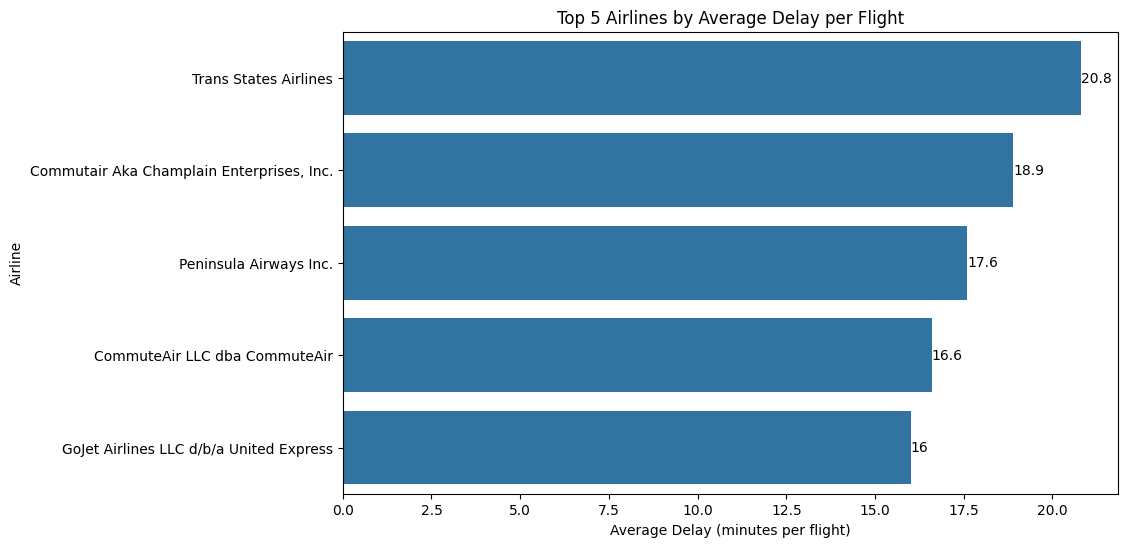

In [7]:
airline_delay = df.groupby("carrier_name")[["avg_delay_flights_all"]].mean().sort_values("avg_delay_flights_all", ascending=False).head(5)
airline_delay = airline_delay.round({'avg_delay_flights_all': 1})

plt.figure(figsize=(10, 6))
ax=sns.barplot(x="avg_delay_flights_all", y=airline_delay.index, data=airline_delay)
ax.bar_label(ax.containers[0])
plt.title("Top 5 Airlines by Average Delay per Flight")
plt.xlabel("Average Delay (minutes per flight)")
plt.ylabel("Airline")
plt.show()

### Delay by Airport

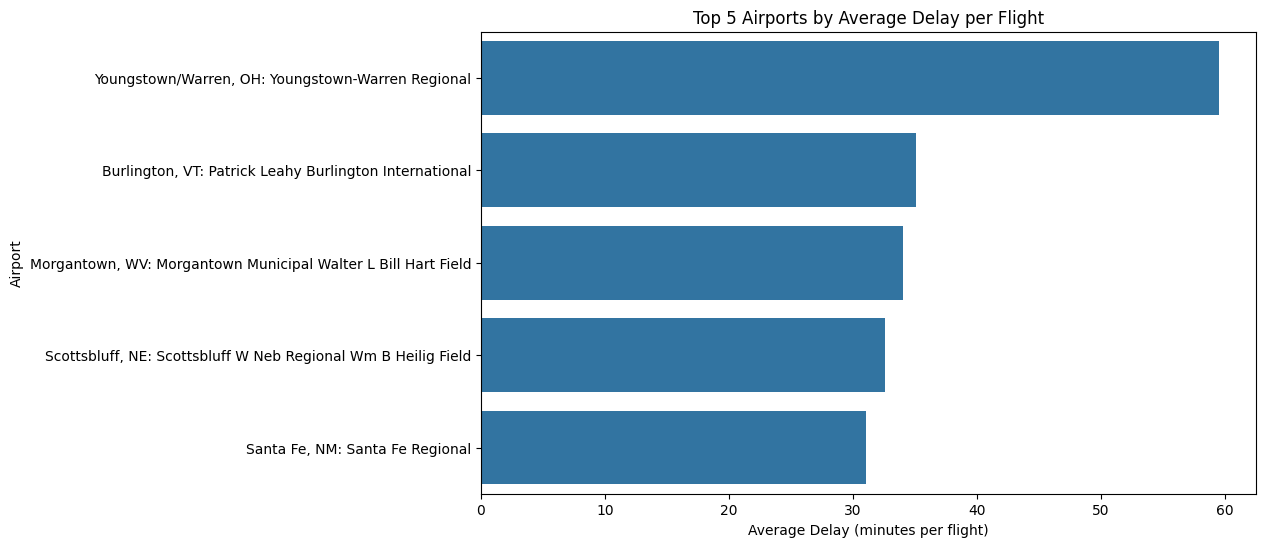

In [8]:
airport_delay = df.groupby("airport_name")[["delayed_flights_perc", "avg_delay_flights_all"]].mean().sort_values("avg_delay_flights_all", ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x="avg_delay_flights_all", y=airport_delay.index, data=airport_delay)
plt.title("Top 5 Airports by Average Delay per Flight")
plt.xlabel("Average Delay (minutes per flight)")
plt.ylabel("Airport")
plt.show()

### Delay Composition

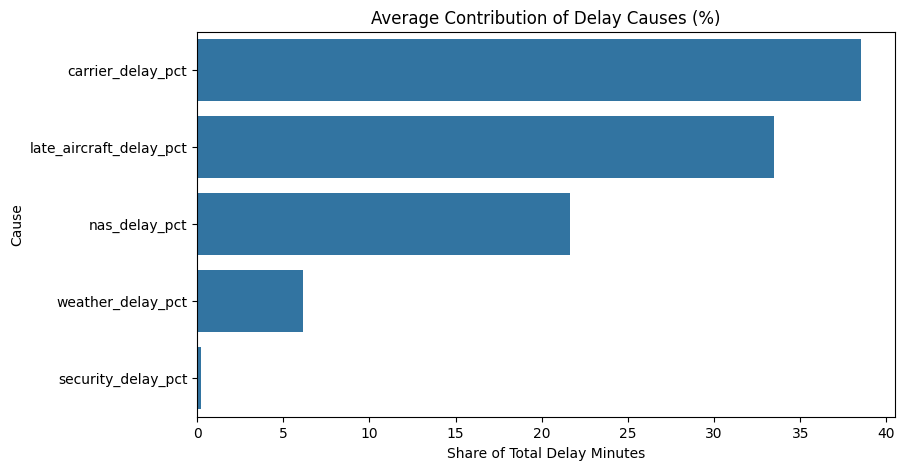

In [9]:
delay_cols = ["carrier_delay", "weather_delay", "nas_delay", "security_delay", "late_aircraft_delay"]
avg_cause_pct = df[[f"{c}_pct" for c in delay_cols]].mean().sort_values(ascending=False)
plt.figure(figsize=(9, 5))
sns.barplot(x=avg_cause_pct.values, y=avg_cause_pct.index)
plt.title("Average Contribution of Delay Causes (%)")
plt.xlabel("Share of Total Delay Minutes")
plt.ylabel("Cause")
plt.show()

# Correlation Study

### Correlation and PPS

In [10]:
import ppscore as pps
import numpy as np

def heatmap_corr(df,threshold, figsize=(20,12), font_annot = 8):
  if len(df.columns) > 1:
    mask = np.zeros_like(df, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    mask[abs(df) < threshold] = True

    fig, axes = plt.subplots(figsize=figsize)
    sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                linewidth=0.5
                     )
    axes.set_yticklabels(df.columns, rotation = 0)
    plt.ylim(len(df.columns),0)
    plt.show()


def heatmap_pps(df,threshold, figsize=(20,12), font_annot = 8):
    if len(df.columns) > 1:

      mask = np.zeros_like(df, dtype=bool)
      mask[abs(df) < threshold] = True

      fig, ax = plt.subplots(figsize=figsize)
      ax = sns.heatmap(df, annot=True, xticklabels=True,yticklabels=True,
                       mask=mask,cmap='rocket_r', annot_kws={"size": font_annot},
                       linewidth=0.05,linecolor='grey')
      
      plt.ylim(len(df.columns),0)
      plt.show()


def CalculateCorrAndPPS(df):
  df_corr_spearman = df.corr(method="spearman")
  df_corr_pearson = df.corr(method="pearson")

  pps_matrix_raw = pps.matrix(df)
  pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

  pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
  print("--- PPS threshold - PPS score IQR --- \n")
  print(pps_score_stats.round(3))

  return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix,CorrThreshold,PPS_Threshold,
                      figsize=(20,12), font_annot=8 ):

  print("\n")
  print("*** Heatmap: Spearman Correlation ***")
  heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

  print("\n")
  print("*** Heatmap: Pearson Correlation ***")
  heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

  print("\n")
  print("*** Heatmap: Predictive power Score (PPS) ***")
  heatmap_pps(df=pps_matrix,threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

In [11]:
corr_cols = delay_cols + ["arr_delay", "delayed_flights_perc", "avg_delay_flights_all", "arr_del15", "arr_flights", "avg_delay_flights_delayed"]
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df[corr_cols])

--- PPS threshold - PPS score IQR --- 

         count   mean    std  min  25%  50%    75%    max
ppscore  110.0  0.105  0.188  0.0  0.0  0.0  0.097  0.693


In [57]:
df_corr_pearson['delayed_flights_perc'].sort_values(key=abs, ascending=False)

delayed_flights_perc         1.000000
avg_delay_flights_all        0.592559
avg_delay_flights_delayed    0.107609
nas_delay                    0.099005
arr_delay                    0.096527
arr_del15                    0.091414
late_aircraft_delay          0.089344
weather_delay                0.076028
carrier_delay                0.071810
security_delay               0.032613
arr_flights                 -0.018591
Name: delayed_flights_perc, dtype: float64

Create heatmap plot



*** Heatmap: Spearman Correlation ***


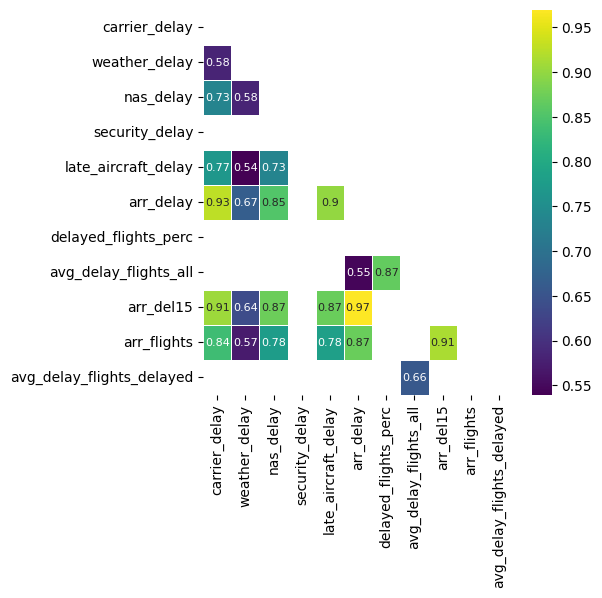



*** Heatmap: Pearson Correlation ***


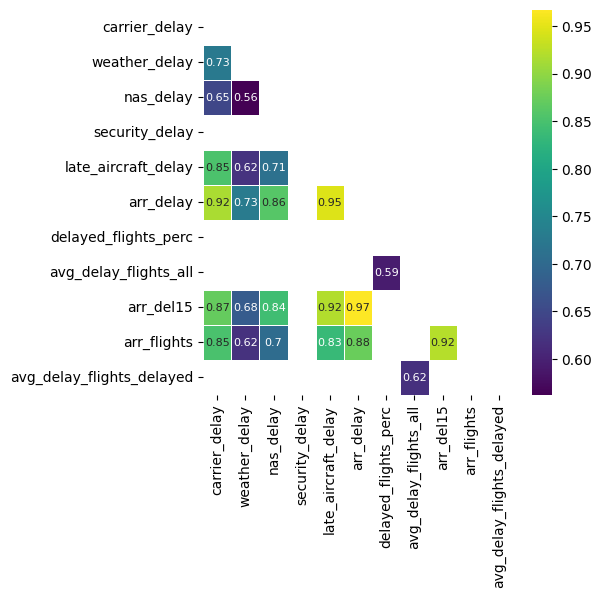



*** Heatmap: Predictive power Score (PPS) ***


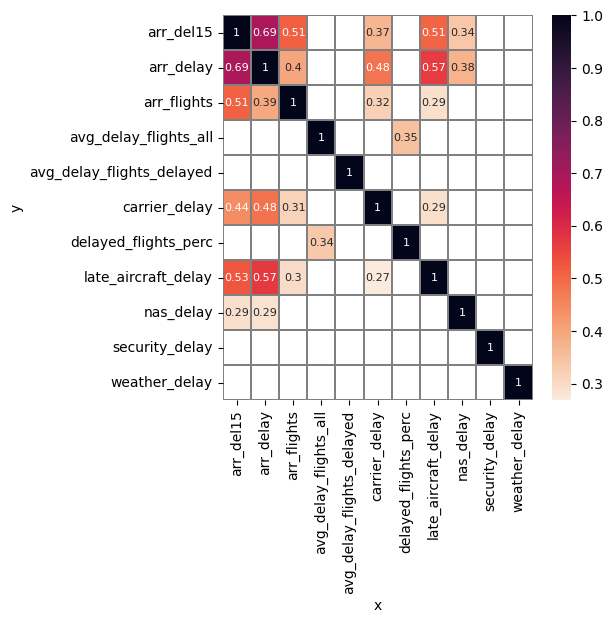

In [53]:
DisplayCorrAndPPS(df_corr_pearson=df_corr_pearson,
                  df_corr_spearman=df_corr_spearman, 
                  pps_matrix=pps_matrix,
                  CorrThreshold=0.5, PPS_Threshold=0.15,
                  figsize=(5,5), font_annot=8)

In [ ]:
# Plots variables by type:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


def plot_categorical(df, col, target_var):

    plt.figure(figsize=(12, 5))
    sns.countplot(data=df, x=col, hue=target_var, order=df[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()


def plot_numerical(df, col, target_var):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue=target_var, kde=True, element="step")
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()


target_var = 'Churn'
for col in vars_to_study:
    if df_eda[col].dtype == 'object':
        plot_categorical(df_eda, col, target_var)
        print("\n\n")
    else:
        plot_numerical(df_eda, col, target_var)
        print("\n\n")

### Delay cause by Month

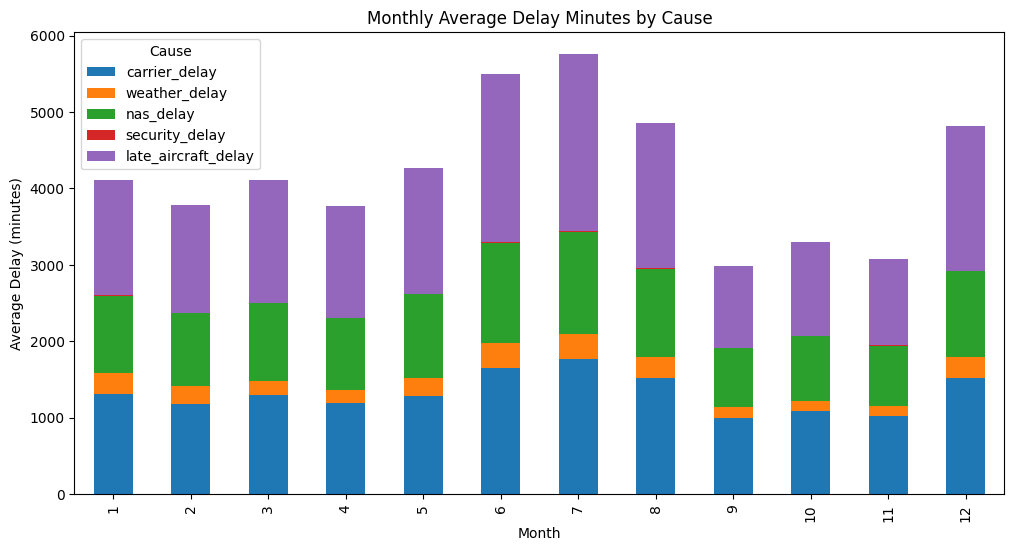

In [16]:
monthly_causes = df.groupby("month")[delay_cols].mean().reset_index()
monthly_causes.set_index("month").plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Monthly Average Delay Minutes by Cause")
plt.ylabel("Average Delay (minutes)")
plt.xlabel("Month")
plt.legend(title="Cause")
plt.show()

### Delay Cause by airport

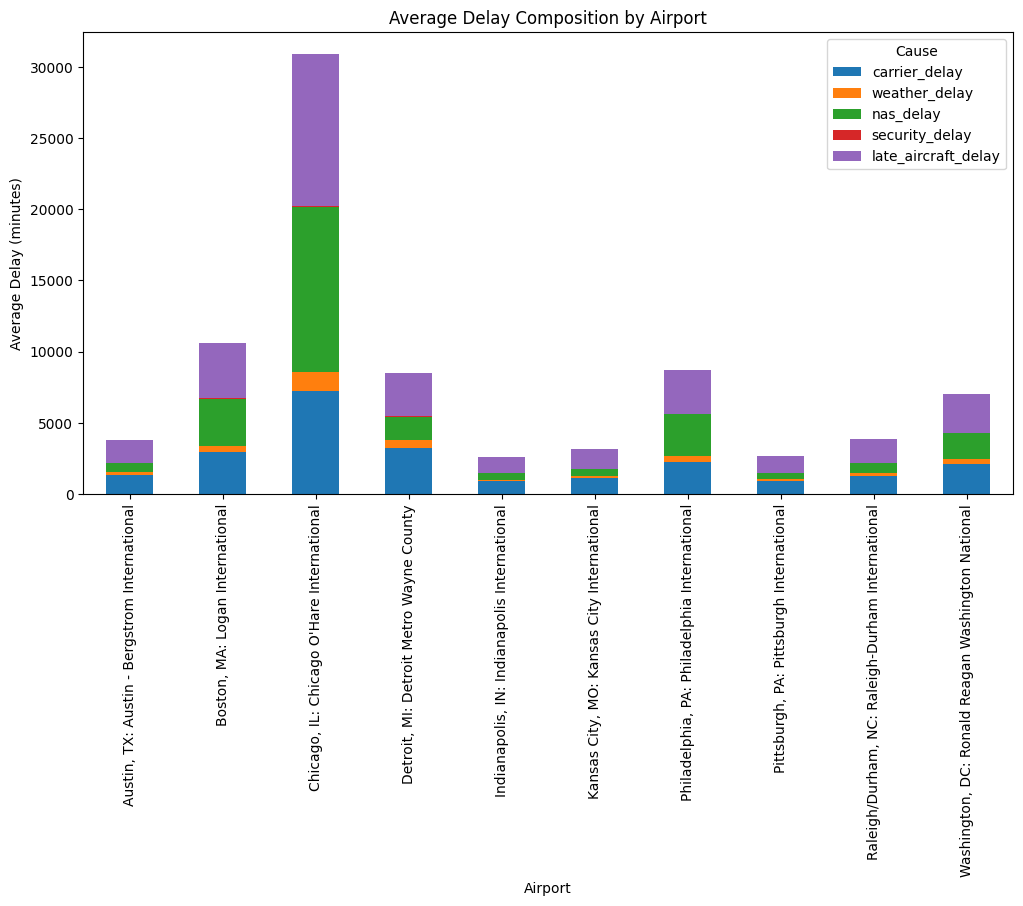

In [17]:
top_airports = df["airport_name"].value_counts().head(10).index
airport_causes = df[df["airport_name"].isin(top_airports)].groupby("airport_name")[delay_cols].mean()
airport_causes.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Average Delay Composition by Airport")
plt.ylabel("Average Delay (minutes)")
plt.xlabel("Airport")
plt.legend(title="Cause")
plt.show()

In [17]:
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(variables=df.columns[df.dtypes=='object'].to_list(), drop_last=False)
df_ohe = encoder.fit_transform(df)
print(df_ohe.shape)
df_ohe.head(3)

/home/cistudent/.local/lib/python3.12/site-packages/feature_engine/encoding/one_hot.py:277: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
/home/cistudent/.local/lib/python3.12/site-packages/feature_engine/encoding/one_hot.py:277: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
/home/cistudent/.local/lib/python3.12/site-packages/feature_engine/encoding/one_hot.py:277: PerformanceWarning: DataFrame 

: 

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In case you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)
